In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
power = pd.read_csv('/content/drive/My Drive/household_power_consumption.txt',index_col=['Date'], sep = ';')

In [4]:
power.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
power.shape

(2075259, 8)

In [6]:
power.dtypes

Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [7]:
power.index = pd.to_datetime(power.index)

In [8]:
power.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
for col in power.columns[1:7]:
    power[col] = power[col].str.replace('?', '')

In [10]:
for col in power.columns[1:7]:
    power[col] = pd.to_numeric(power[col])

In [11]:
power_daily = power.resample('D').sum()

In [12]:
power_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [13]:
power_daily.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

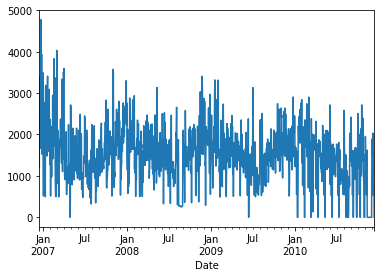

In [14]:
power_daily['Global_active_power'].plot()
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaled_daily = pd.DataFrame(scaler.fit_transform(power_daily), columns = power_daily.columns)

In [19]:
from scipy.stats import pearsonr
corr, _ = pearsonr(power_daily['Global_active_power'], power_daily['Global_reactive_power'])

In [20]:
corr

0.30628859528184066

In [21]:
pearsonr(power_daily['Voltage'], power_daily['Global_intensity'])

(0.4806141154557484, 4.499880848983536e-85)

In [22]:
power_daily = power_daily.reset_index()

In [23]:
power_daily

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1452,2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
1453,2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
1454,2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
1455,2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0


In [24]:
uni_x = power_daily.iloc[:,0:2]

In [25]:
uni_x.head()

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [26]:
power_df = uni_x.rename(columns={'Date': 'ds', 'Global_active_power': 'y'})

In [57]:
train_x = power_df.iloc[:1092,:]
test_x = power_df.iloc[1092:,:]

In [28]:
from fbprophet import Prophet

In [59]:
model = Prophet(daily_seasonality=True)

In [60]:
model.fit(train_x)

In [61]:
future = model.make_future_dataframe(periods= 365) 
forecast = model.predict(test_x.drop(['y'], axis = 1)) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-12-12,1952.936581,1268.852191,2666.745073,1170.092659,1170.092659,1170.092659
1,2009-12-13,1950.666501,1203.404089,2715.112490,1169.993534,1169.993534,1169.993534
2,2009-12-14,1735.612213,989.380271,2478.718136,1169.894409,1169.894409,1169.894409
3,2009-12-15,1861.559118,1111.992473,2505.271145,1169.795284,1169.795284,1169.795284
4,2009-12-16,1837.899815,1126.538251,2613.344099,1169.696159,1169.696159,1169.696159
...,...,...,...,...,...,...,...
360,2010-12-07,1766.805125,1023.922845,2401.605218,1134.407623,1133.316898,1135.594213
361,2010-12-08,1727.929951,1009.008191,2429.312826,1134.308498,1133.211233,1135.498665
362,2010-12-09,1647.580186,895.625031,2397.069088,1134.209373,1133.105758,1135.402240
363,2010-12-10,1732.342513,1014.715362,2508.537606,1134.110248,1133.005372,1135.305815


In [32]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred/y_true))) * 100

In [62]:
error = mean_absolute_percentage_error(test_x['y'] ,forecast.iloc[:,1])

In [63]:
error

inf

In [35]:
from sklearn.metrics import mean_squared_error

In [72]:
mean_squared_error(test_x['y'], forecast.iloc[:,1]) **0.5

727.5106888752464

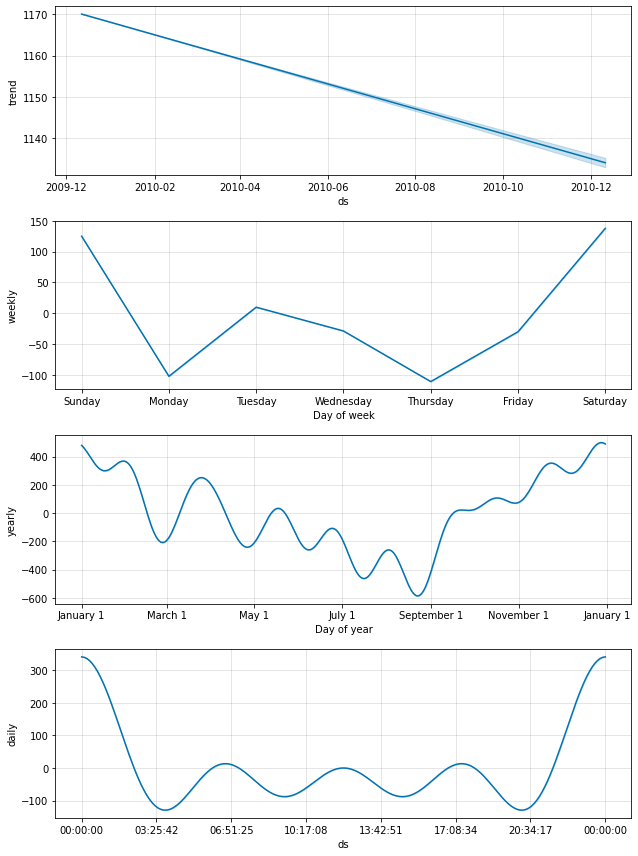

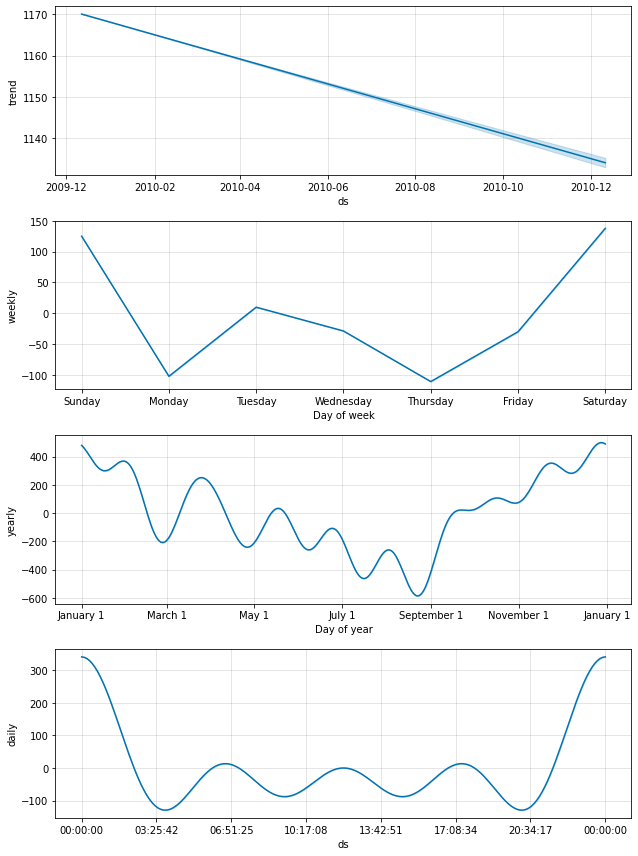

In [66]:
model.plot_components(forecast)

In [38]:
multi_x = power_daily.iloc[:,0:2]

In [39]:
multi_x = multi_x.rename(columns={'Date': 'ds', 'Global_active_power': 'y'})

In [40]:
multi_x['Global_reactive_power'] = power_daily['Global_reactive_power']
multi_x['Voltage'] = power_daily['Voltage']
multi_x['Global_intensity'] = power_daily['Global_intensity']
multi_x['Sub_metering_1'] = power_daily['Sub_metering_1']
multi_x['Sub_metering_2'] = power_daily['Sub_metering_2']
multi_x['Sub_metering_3'] = power_daily['Sub_metering_3']

In [41]:
train_X = multi_x.iloc[:1092,:]
test_X = multi_x.iloc[1092:,:]

In [42]:
model_2 = Prophet(daily_seasonality=True)
model_2.add_regressor('Global_reactive_power')
model_2.add_regressor('Voltage')
model_2.add_regressor('Global_intensity')
model_2.add_regressor('Sub_metering_1')
model_2.add_regressor('Sub_metering_2')
model_2.add_regressor('Sub_metering_3')
model_2.fit(train_X)

In [67]:
future_2 = model_2.make_future_dataframe(periods= 365) 
forecast_2 = model_2.predict(test_X.drop(['y'], axis = 1)) 
forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Global_intensity,Global_intensity_lower,Global_intensity_upper,Global_reactive_power,Global_reactive_power_lower,Global_reactive_power_upper,Sub_metering_1,Sub_metering_1_lower,Sub_metering_1_upper,Sub_metering_2,Sub_metering_2_lower,Sub_metering_2_upper,Sub_metering_3,Sub_metering_3_lower,Sub_metering_3_upper,Voltage,Voltage_lower,Voltage_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-12-12,1310.813867,1768.648587,1807.006648,1310.813867,1310.813867,220.907730,220.907730,220.907730,-19.636659,-19.636659,-19.636659,0.995090,0.995090,0.995090,-2.206211,-2.206211,-2.206211,-0.783807,-0.783807,-0.783807,0.454266,0.454266,0.454266,477.237534,477.237534,477.237534,271.388803,271.388803,271.388803,199.730410,199.730410,199.730410,1.207448,1.207448,1.207448,4.910873,4.910873,4.910873,0.0,0.0,0.0,1788.051401
1,2009-12-13,1310.840251,2094.352759,2132.809179,1310.840251,1310.840251,534.456930,534.456930,534.456930,-12.601801,-12.601801,-12.601801,-4.071536,-4.071536,-4.071536,1.545464,1.545464,1.545464,5.182583,5.182583,5.182583,0.419752,0.419752,0.419752,803.589553,803.589553,803.589553,271.388803,271.388803,271.388803,524.931392,524.931392,524.931392,1.440278,1.440278,1.440278,5.829080,5.829080,5.829080,0.0,0.0,0.0,2114.429804
2,2009-12-14,1310.866635,1750.603565,1789.815153,1310.866635,1310.866635,172.665684,172.665684,172.665684,6.007968,6.007968,6.007968,0.989843,0.989843,0.989843,-0.342025,-0.342025,-0.342025,2.264084,2.264084,2.264084,0.548878,0.548878,0.548878,459.306145,459.306145,459.306145,271.388803,271.388803,271.388803,182.134433,182.134433,182.134433,-1.003819,-1.003819,-1.003819,6.786728,6.786728,6.786728,0.0,0.0,0.0,1770.172780
3,2009-12-15,1310.893019,1890.162654,1928.371793,1310.893019,1310.893019,308.813316,308.813316,308.813316,3.261352,3.261352,3.261352,0.953116,0.953116,0.953116,1.570793,1.570793,1.570793,6.268034,6.268034,6.268034,0.540617,0.540617,0.540617,599.014958,599.014958,599.014958,271.388803,271.388803,271.388803,321.407228,321.407228,321.407228,-1.551407,-1.551407,-1.551407,7.770334,7.770334,7.770334,0.0,0.0,0.0,1909.907977
4,2009-12-16,1310.919403,1358.470755,1398.789171,1310.919403,1310.919403,-219.053944,-219.053944,-219.053944,5.359086,5.359086,5.359086,0.897150,0.897150,0.897150,-1.013739,-1.013739,-1.013739,-0.896425,-0.896425,-0.896425,0.632322,0.632322,0.632322,67.643944,67.643944,67.643944,271.388803,271.388803,271.388803,-214.075550,-214.075550,-214.075550,1.565347,1.565347,1.565347,8.765343,8.765343,8.765343,0.0,0.0,0.0,1378.563346


In [68]:
mean_absolute_percentage_error(test_X['y'] ,forecast_2.iloc[:,-1])

inf

In [69]:
(mean_squared_error(test_X['y'] ,forecast_2.iloc[:,-1]))**0.5

16.64446868240439

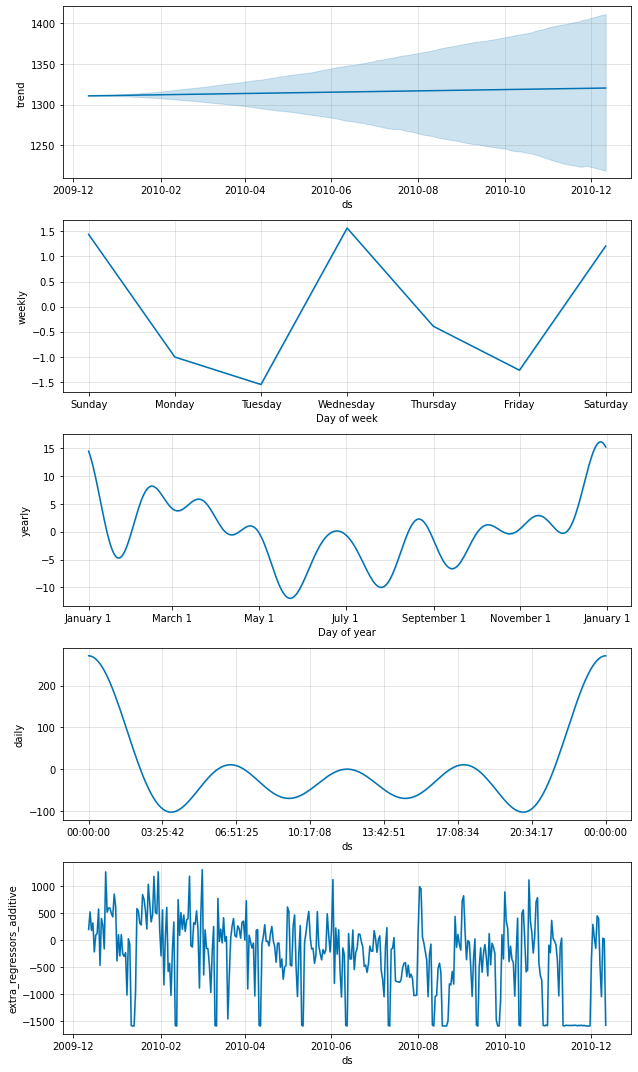

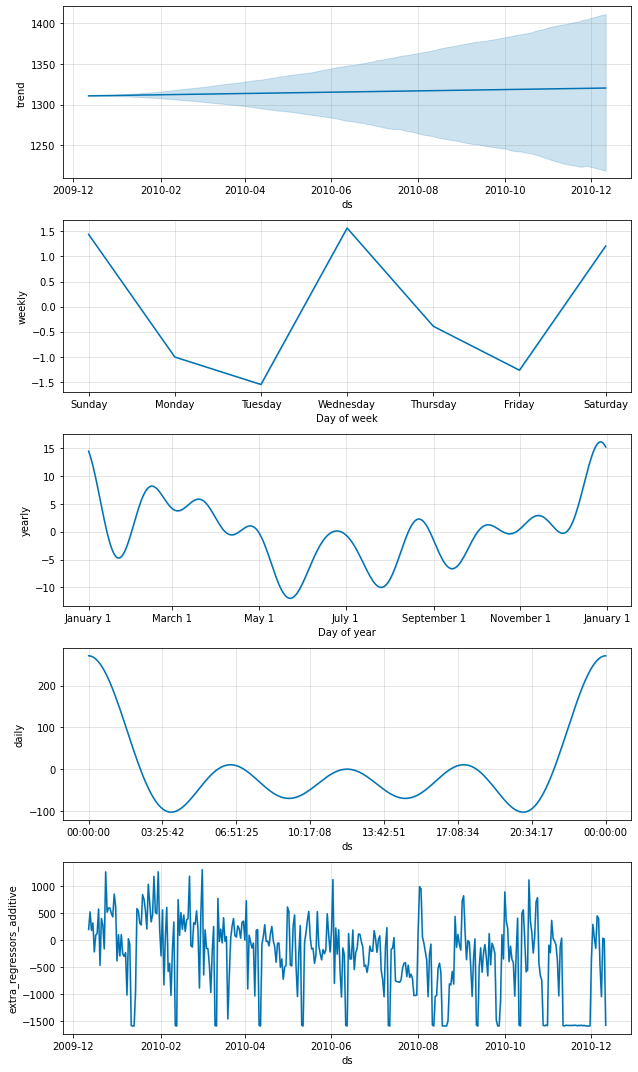

In [70]:
model_2.plot_components(forecast_2)